# Pytorch Workflow

In [290]:
import torch
# ! contains all neural networks of pytorch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
torch.__version__

'2.4.0+cu124'

In [291]:
device=torch.cuda.is_available()
device

True

# 1. Data Preparing and Loading

In [292]:
weight=0.7
bias=0.3
# Create random data
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

train test split

In [293]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]

X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

VIsualize the data

In [294]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
    plt.figure(figsize=(10,7))
    # todo training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training")
    # todo testing data in green
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing")
    # todo predictions in red
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
    plt.legend()
    # plt.show()

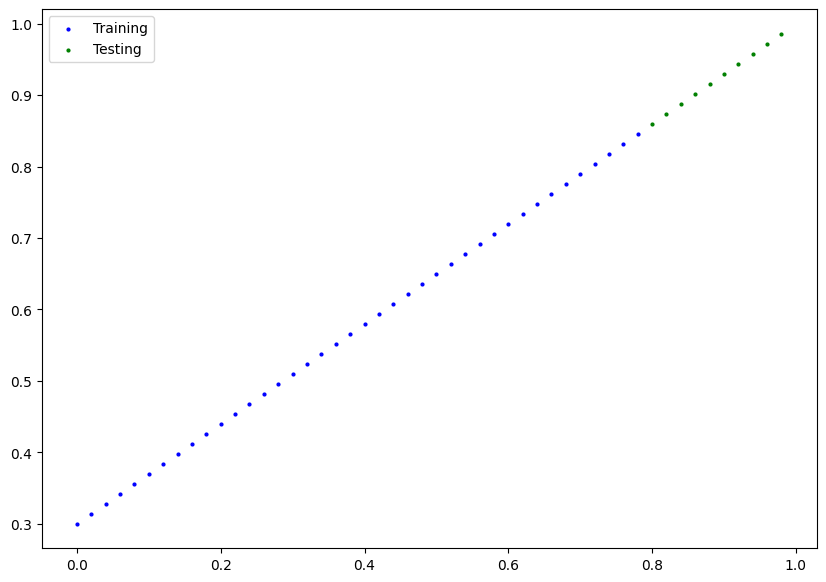

In [295]:
plot_predictions()

# 2. Build Model

In [296]:

# ! linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

        # ^ Forward method to define computation in the model
    def forward(self,x:torch.Tensor):
        # * X as input
        # ? Linear Regression formula
        return self.weights*x+self.bias
    

# Checking the contents of our pytorch model

In [297]:
torch.manual_seed(42)

# * Create a instance od the model
model_0=LinearRegressionModel()
# *parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [298]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Make Prediction with model

In [299]:

# ! Inference mode is preffered
# * does not do gradient calculation and is fase
with torch.inference_mode():
    y_preds=model_0(X_test)
with torch.no_grad():
    y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

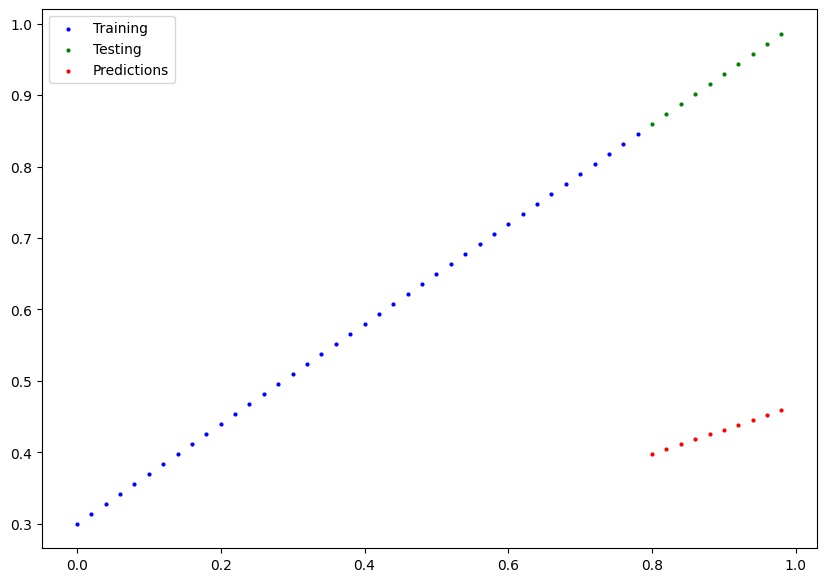

In [300]:
plot_predictions(predictions=y_preds)

# 3. Training the model

In [301]:

# ^ Loss Function
loss_fn=nn.L1Loss()

# ^ Optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

Building a training Loop

In [302]:
epochs=200
# todo track losses and other matrixes
epoch_count=[]
loss_values=[]
test_loss_values=[]

#* 0. loop through the data
for epoch in range(epochs):
    # ? model to training mode
    # ! sets all parameters that requires gradient to requirre gradientz
    model_0.train()

    # * 1. forward pass
    y_pred=model_0(X_train)

    # * 2. loss calculation
    loss=loss_fn(y_pred,y_train)
    # print(f"loss:{loss}")
    # * 3. zero the gradients
    optimizer.zero_grad()

    # * 4. backward pass

    loss.backward()
    # * 5. weight update

    optimizer.step()

    # ? TESTING
    model_0.eval()

    
    # ! Testing
    with torch.inference_mode():
        # *1. Forward Pass
        test_pred=model_0(X_test)

        # *2. Calculate the loss
        test_loss=loss_fn(test_pred,y_test)

    # *print what is happening
    if epoch%10==0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch : {epoch} | loss: {loss} | Test loss: {test_loss}")

        # ^ model state dict
        print(model_0.state_dict())


Epoch : 0 | loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch : 10 | loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch : 20 | loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch : 30 | loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch : 40 | loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch : 50 | loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch : 60 | loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch : 70 | lo

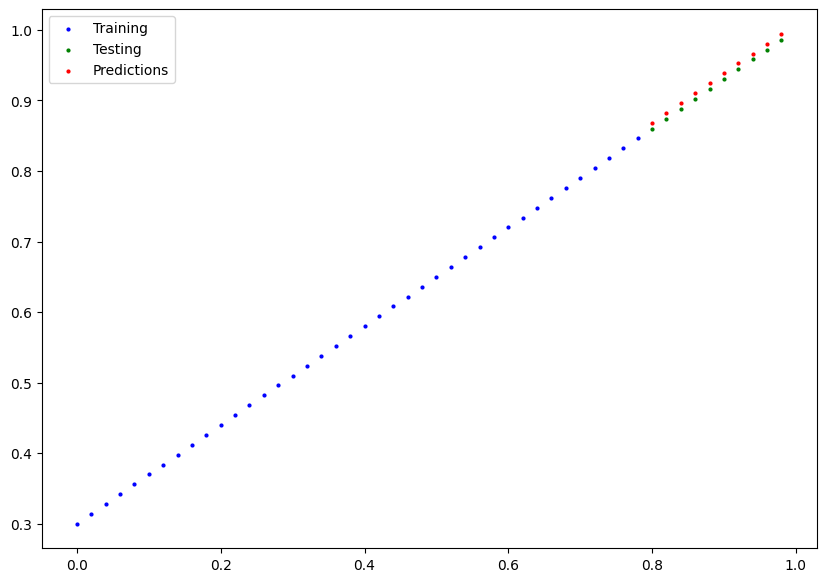

In [303]:
with torch.inference_mode():    
    y_pred=model_0(X_test)
plot_predictions(predictions=y_pred)

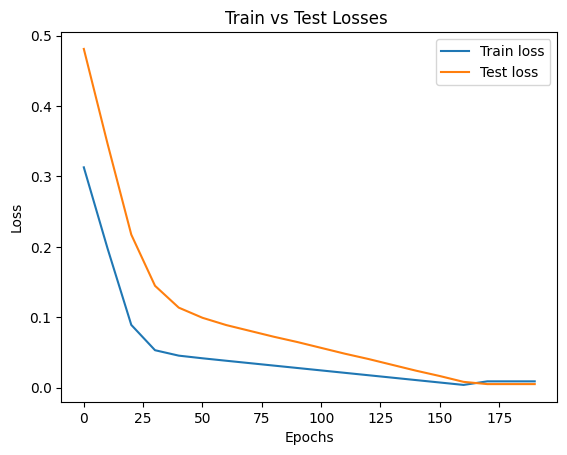

In [306]:
plt.plot(np.array(torch.tensor(epoch_count).numpy()),np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Train vs Test Losses ")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Saving and Loading a model

In [308]:

# * saving model
from pathlib import Path

# * 1. Create directory
MODEL_PATH=Path("Section_3/models")

# * 2. Check if directory exists
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# * 3. Save model path
MODEL_NAME="03_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

# * 4. Save model
print(f"Saving Model path: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving Model path: Section_3\models\03_pytorch_workflow_model_0.pth


loading model

In [310]:

# ? as we only saved model state dict so can only load that
# todo we have to insrtantiate a new instace of model class

loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

C:\Users\ArnavBhatia\AppData\Local\Temp\ipykernel_688\3498325397.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_P

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [311]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [312]:
# Compare
loaded_model_preds==y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 6. Putting it together


In [313]:
import torch 
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

Device Agnostic code -> for cuda


In [314]:
device="cuda" if torch.cuda.is_available() else "cpu"
print("Using device:",device)

Using device: cuda


6.1 Data

In [315]:
weight=0.7
bias=0.3
# Create random data
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

split data

In [316]:
train_split=int (0.8*len(X))

X_train,y_train=X[:train_split],y[:train_split]

X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

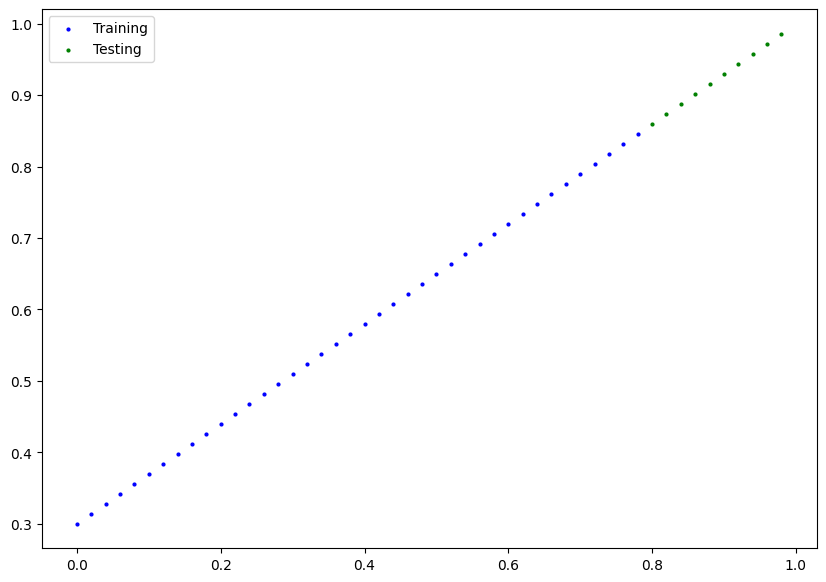

In [317]:

# ? Plot Data
plot_predictions()

Model

In [318]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # ! using nn.Linaer(0 for creating model parameters)
        self.linear_layer=nn.Linear(in_features=1,out_features=1)
    def forward(self,x:torch.Tensor):
        # ? INput and output are torch tensors
        return self.linear_layer(x)

In [319]:
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [322]:
next(model_1.parameters()).device

device(type='cpu')

change device

In [323]:
model_1.to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

Training

In [324]:
Epochs=100
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [326]:

#^ training loop

epoch_count=[]
loss_values=[]
test_loss_values=[]

# * 0. loop through the data
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
    # ? model to training mode
    model_1.train()
    # * 1. Forward pass
    y_pred=model_1(X_train.to(device))
    # * 2. Loss calculation
    loss=loss_fn(y_pred,y_train.to(device))
    # * 3. zero the gradients
    optimizer.zero_grad()
    # * 4. backward pass
    loss.backward()
    # * 5. weight update
    optimizer.step()
    # ? TESTING
    model_1.eval()
    with torch.inference_mode():
        # *1. Forward Pass
        test_pred=model_1(X_test.to(device))
        # *2. Calculate the loss
        test_loss=loss_fn(test_pred,y_test.to(device))
    # *print what is happening
    if epoch%10==0:
        epoch_count.append(epoch)
        loss_values.append(loss.item())
        test_loss_values

In [332]:
model_1.eval()
with torch.inference_mode():
    y_pred=model_1(X_test.to(device))
y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

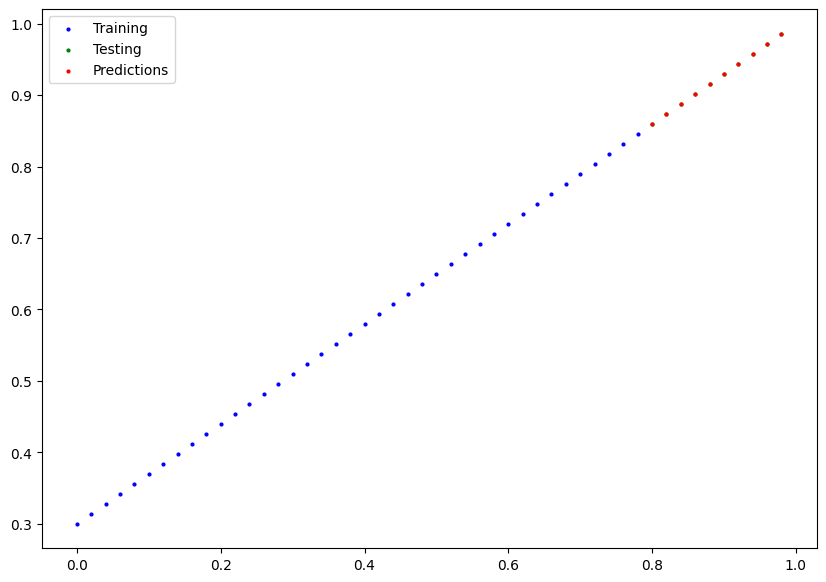

In [336]:
plot_predictions(predictions=y_pred.cpu())

In [337]:

# * saving model
from pathlib import Path

# * 1. Create directory
MODEL_PATH=Path("Section_3/models")

# * 2. Check if directory exists
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# * 3. Save model path
MODEL_NAME="03_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

# * 4. Save model
print(f"Saving Model path: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

Saving Model path: Section_3\models\03_pytorch_workflow_model_1.pth


loading  model

In [339]:
loaded_model_1=LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

C:\Users\ArnavBhatia\AppData\Local\Temp\ipykernel_688\3043050901.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PAT

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [340]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds=loaded_model_1(X_test)
y_pred==loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')